## **University Tuition Machine & Deep Learning Models**

## Importing Data + Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Import Data
np.random.seed(0)
train_data=pd.read_csv('colleges_train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              400 non-null    object 
 1   state             400 non-null    object 
 2   adm_rate          400 non-null    float64
 3   satv25            400 non-null    int64  
 4   satv50            400 non-null    int64  
 5   satv75            400 non-null    int64  
 6   satm25            400 non-null    int64  
 7   satm50            400 non-null    int64  
 8   satm75            400 non-null    int64  
 9   pell_grant_rate   400 non-null    float64
 10  fed_loan_rate     400 non-null    float64
 11  ug                400 non-null    int64  
 12  ug_men            400 non-null    float64
 13  ug_women          400 non-null    float64
 14  ug_white          400 non-null    float64
 15  ug_black          400 non-null    float64
 16  ug_hispanic       400 non-null    float64
 1

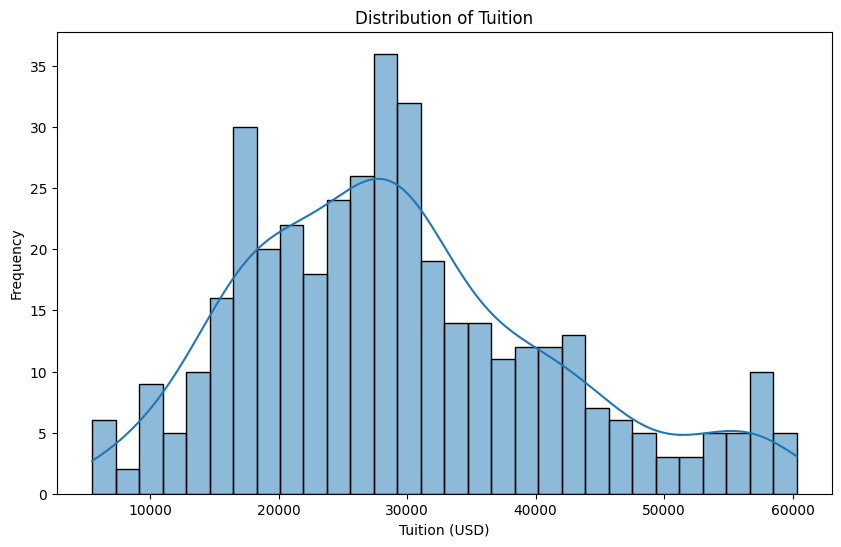

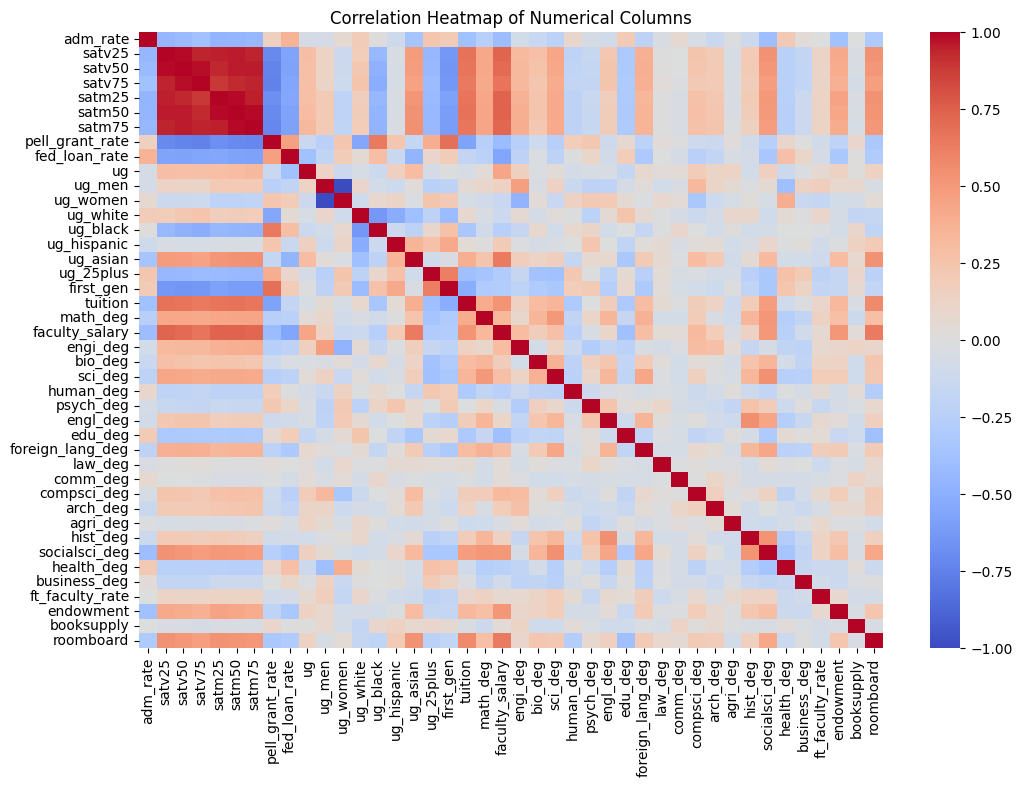

In [4]:
# EDA
print(train_data.info())
print(train_data.describe())

## Histogram of Target Variable
plt.figure(figsize=(10,6))
sns.histplot(train_data['tuition'], bins=30, kde=True)
plt.title('Distribution of Tuition')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')
plt.show()


## Heatmap of Correlations (Excludes: 01 - Name, 02 - State)
plt.figure(figsize=(12, 8))
numeric_train_data = train_data.select_dtypes(include=np.number)
sns.heatmap(numeric_train_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()


## Splitting Data (Not Standardized)

In [5]:
# Splitting into Features & Target
x_train_data = train_data.drop(['name', 'tuition'], axis=1)
y_train_data = train_data['tuition']

# Splitting into Train/Test (80% / 20%)
n_train = 320
n_test = 80
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=n_test, train_size=n_train, random_state=0)

## Simple Linear Regression


In [6]:
## Import
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
linreg = LinearRegression()

## Dummy Variables For Each State
state_dummies = pd.get_dummies(train_data['state'], drop_first=True, dtype=int)
train_data_with_dummies = pd.concat([train_data, state_dummies], axis=1)
train_data_with_dummies.drop(columns=['state'], inplace=True)
x_train_data = train_data_with_dummies.drop(['name', 'tuition'], axis=1)

## Loop through each feature for SLR
for f in x_train_data.columns:
    ### Select Term
    x_feature = x_train_data[f].values.reshape(-1, 1)

    ### Standardize Features & Split Data
    x_stan = scaler.fit_transform(x_feature)
    x_stan3 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])
    x_train, x_test, y_train, y_test = train_test_split(x_stan3, y_train_data, test_size=0.2, random_state=2)

    ### Fit Model
    linreg.fit(x_train, y_train)
    y_pred = linreg.predict(x_test)

    ### Model Evaluation
    test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
    baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

    ### Print Model Statistics
    print(f'Test RMSE of SLR for feature "{f}": {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}')
    R2 = 1 - test_error**2 / baseline_error**2
    print(f'Test R-squared of SLR for feature "{f}": {R2:.3f}\n')


Test RMSE of SLR for feature "adm_rate": 11398.016   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "adm_rate": -0.024

Test RMSE of SLR for feature "satv25": 9110.464   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "satv25": 0.346

Test RMSE of SLR for feature "satv50": 9287.596   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "satv50": 0.320

Test RMSE of SLR for feature "satv75": 9680.815   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "satv75": 0.261

Test RMSE of SLR for feature "satm25": 9373.686   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "satm25": 0.308

Test RMSE of SLR for feature "satm50": 9269.152   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "satm50": 0.323

Test RMSE of SLR for feature "satm75": 9284.650   Baseline RMSE: 11264.402
Test R-squared of SLR for feature "satm75": 0.321

Test RMSE of SLR for feature "pell_grant_rate": 9460.307   Baseline RMSE: 11264.402
Test R-squared of SLR for fe

## Multiple Linear Regression (All Features)

In [7]:
## Standardize Without Dummies
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])

# Add & Concatenate Dummies
state_dummies = pd.get_dummies(train_data['state'], drop_first=True, dtype=int)
train_data_with_dummies = pd.concat([train_data, state_dummies], axis=1)
train_data_with_dummies.drop(columns=['state'], inplace=True)
x_train_data = train_data_with_dummies.drop(['name', 'tuition'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)

## All-Possible MLR
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

## Model Evaluation
test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

## Print Model Statistics
print(f"Test RMSE of All-Possible MLR: {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of All-Possible MLR: {R2:.3f}")

Test RMSE of All-Possible MLR: 6542.781   Baseline RMSE: 11264.402
Test R-squared of All-Possible MLR: 0.663


## Multiple Linear Regression (STEM & Humanities Included)

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


train_data = pd.read_csv('colleges_train.csv')


train_data['stem_degrees'] = train_data['math_deg'] + train_data['engi_deg'] + train_data['bio_deg'] + train_data['sci_deg'] + train_data['compsci_deg'] + train_data['arch_deg'] + train_data['agri_deg'] + train_data['health_deg']
train_data['humanities_degrees'] = train_data['comm_deg'] + train_data['human_deg'] + train_data['business_deg'] + train_data['socialsci_deg'] + train_data['law_deg'] + train_data['foreign_lang_deg'] + train_data['edu_deg'] + train_data['engl_deg'] + train_data['psych_deg'] + train_data['hist_deg']
train_data['ug_minority'] = 1 - train_data['ug_white']
train_data['sat'] = train_data['satv50'] + train_data['satm50']
train_data['satmprop'] = train_data['satm50'] / train_data['sat']
train_data['satvprop'] = 1 - train_data['satmprop']
train_data['pt_faculty_rate'] = 1 - train_data['ft_faculty_rate']


features = [
    'adm_rate', 'faculty_salary', 'ug', 'booksupply', 'roomboard', 'sat', 'satvprop', 'satmprop',
    'stem_degrees', 'humanities_degrees', 'ug_white', 'ug_minority',
    'first_gen', 'fed_loan_rate', 'endowment', 'ft_faculty_rate'
]
x_data = train_data[features]
y_data = train_data['tuition']


x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=0
)

linreg = LinearRegression()
linreg.fit(x_train, y_train)

y_pred = linreg.predict(x_test)

test_error = np.sqrt(mean_squared_error(y_test, y_pred))
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

print(f"Test RMSE of All-Possible MLR: {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of All-Possible MLR: {R2:.3f}")


Test RMSE of All-Possible MLR: 6509.258   Baseline RMSE: 12479.295
Test R-squared of All-Possible MLR: 0.728


## Stepwise Regression (Forward Selection)

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
model = LinearRegression()

## Standardize Without Dummies
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])

# Add & Concatenate Dummies
state_dummies = pd.get_dummies(train_data['state'], drop_first=True, dtype=int)
train_data_with_dummies = pd.concat([train_data, state_dummies], axis=1)
train_data_with_dummies.drop(columns=['state'], inplace=True)
x_train_data = train_data_with_dummies.drop(['name', 'tuition'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)

## SWR Model: 3 Features
sfs_3 = sfs(model, k_features=3, forward=True, floating=False, scoring='r2', cv=5)
sfs_3 = sfs_3.fit(x_train_data, y_train_data)

## Splitting Data With 3 Selected Features
x_selected = sfs_3.transform(x_train_data)
x_train, x_test, y_train, y_test = train_test_split(x_selected, y_train_data, test_size=0.2, random_state=1)

## Fitting SWR Model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Model Evaluation
test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

## Print Model Statistics
print(f"Test RMSE of Forward Stepwise Regression (3Fs): {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of Forward Stepwise Regression (3Fs): {R2:.3f}")

c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

Test RMSE of Forward Stepwise Regression (3Fs): 8173.244   Baseline RMSE: 13086.661
Test R-squared of Forward Stepwise Regression (3Fs): 0.610


c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

In [16]:
## 6 factor SWR
sfs_6 = sfs(model, k_features=6, forward=True, floating=False, scoring='r2', cv=5)
sfs_6 = sfs_6.fit(x_train_data, y_train_data)

## Splitting Data With 3 Selected Features
x_selected = sfs_6.transform(x_train_data)
x_train, x_test, y_train, y_test = train_test_split(x_selected, y_train_data, test_size=0.2, random_state=1)

## Fitting SWR Model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Model Evaluation
test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

## Print Model Statistics
print(f"Test RMSE of Forward Stepwise Regression (6Fs): {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of Forward Stepwise Regression (6Fs): {R2:.3f}")

c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

Test RMSE of Forward Stepwise Regression (6Fs): 6975.467   Baseline RMSE: 13086.661
Test R-squared of Forward Stepwise Regression (6Fs): 0.716


c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

In [10]:
## RMSE vs. k Plot For SWR
def swr(k):
  sfs_k = sfs(model, k_features=k, forward=True, floating=False, scoring='r2', cv=5)
  sfs_k = sfs_k.fit(x_train_data, y_train_data)
  x_selected = sfs_k.transform(x_train_data)
  x_train, x_test, y_train, y_test = train_test_split(x_selected, y_train_data, test_size=0.2, random_state=1)
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
  return test_error

all_errs = []

for k in range(1, 40):
    error = swr(k)
    all_errs.append(error)

plt.plot(range(1, 40), all_errs, marker='o')
plt.xlabel('k')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs. k Stepwise Regressors')
plt.show()

c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\dcali\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\U

In [ ]:
## Standardize Without Dummies
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])

# Add & Concatenate Dummies
state_dummies = pd.get_dummies(train_data['state'], drop_first=True, dtype=int)
train_data_with_dummies = pd.concat([train_data, state_dummies], axis=1)
train_data_with_dummies.drop(columns=['state'], inplace=True)
x_train_data = train_data_with_dummies.drop(['name', 'tuition'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=2)

## 12 factor SWR (Best According to Plot)
sfs_12 = sfs(model, k_features=12, forward=True, floating=False, scoring='r2', cv=5)
sfs_12 = sfs_12.fit(x_train_data, y_train_data)

## Splitting Data With 13 Selected Features
x_selected = sfs_12.transform(x_train_data)
x_train, x_test, y_train, y_test = train_test_split(x_selected, y_train_data, test_size=0.2, random_state=1)

## Fitting SWR Model
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

## Model Evaluation
test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

## Print Model Statistics
print(f"Test RMSE of Forward Stepwise Regression (12Fs): {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of Forward Stepwise Regression (12Fs): {R2:.3f}")

## Multiple Linear Regression (Excluding 'state')

In [ ]:
## Split & Standardize
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])
x_train, x_test, y_train, y_test = train_test_split(x_stan2, y_train_data, test_size=0.2, random_state=2)

## All-Possible Numerical Features MLR
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

## Model Evaluation
test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

## Print Model Statistics
print(f"Test RMSE of All-Possible Numerical Features MLR: {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of All-Possible Numerical Features MLR: {R2:.3f}")


## Kernel Regression (Excluding 'state')

In [ ]:
## Split & Standardize
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])
x_train, x_test, y_train, y_test = train_test_split(x_stan2, y_train_data, test_size=0.2, random_state=2)

h_ls = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10]
all_errs = []

for h in h_ls:
    y_pred = []
    for test_point in x_test:
        distances = np.sqrt(((x_train - test_point)**2).sum(axis=1))
        weights = np.exp( - (distances ** 2) / (h**2) )
        y_pred.append( (y_train * weights).sum() / weights.sum() )

    y_pred = np.array(y_pred)
    test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
    all_errs.append(test_error)

plt.plot(range(len(h_ls)), all_errs, marker='o')
plt.xlabel('h')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs. h')

In [ ]:
## Split & Standardize
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])
x_train, x_test, y_train, y_test = train_test_split(x_stan2, y_train_data, test_size=0.2, random_state=2)

# h = 0.1 (index 3 in h_ls) was identified as the best

## Test Prediction
h=0.1
y_pred_test = []
for test_point in x_test:
  distances = np.sqrt(((x_train - test_point)**2).sum(axis=1))
  weights = np.exp( - (distances ** 2) / (h**2) )
  y_pred_test.append( (y_train * weights).sum() / weights.sum() )

y_pred_test = np.array(y_pred_test)
test_error = np.sqrt(((y_test - y_pred_test) ** 2).mean())

## Model Evaluation
# print(f"Train RMSE of Kernel Regression (h=0.1): {train_error:.3f}")
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())
print(f"Test RMSE of Kernel Regression (h=0.1): {test_error:.3f}\nBaseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of Kernel Regression (h=0.1): {R2:.3f}")

## KNN

In [ ]:
## Split & Standardize
x_train_data = train_data.drop(['name', 'state','tuition'], axis=1)
x_stan = scaler.fit_transform(x_train_data)
x_stan2 = np.hstack([np.ones((x_stan.shape[0], 1)), x_stan])
x_train, x_test, y_train, y_test = train_test_split(x_stan2, y_train_data, test_size=0.2, random_state=2)

from sklearn.neighbors import KNeighborsRegressor
x_train, x_test, y_train, y_test = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=0)
all_errs = []

for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    # Evaluate test error
    test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
    all_errs.append(test_error)

plt.plot(range(1, 30), all_errs, marker='o')
plt.xlabel('k')
plt.ylabel('Test RMSE')
plt.title('Test RMSE vs. k')

## 1-Layer Neural Network


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('colleges_train.csv')

train_data['stem_degrees'] = train_data[['math_deg', 'engi_deg', 'bio_deg', 'sci_deg', 'compsci_deg', 'arch_deg', 'agri_deg', 'health_deg']].sum(axis=1)
train_data['humanities_degrees'] = train_data[['comm_deg', 'human_deg', 'business_deg', 'socialsci_deg', 'law_deg', 'foreign_lang_deg', 'edu_deg', 'engl_deg', 'psych_deg', 'hist_deg']].sum(axis=1)
train_data['ug_minority'] = 1 - train_data['ug_white']
train_data['sat'] = train_data['satv50'] + train_data['satm50']
train_data['satmprop'] = train_data['satm50'] / train_data['sat']
train_data['satvprop'] = 1 - train_data['satmprop']
train_data['pt_faculty_rate'] = 1 - train_data['ft_faculty_rate']

train_data['adm_rate_x_faculty_salary'] = train_data['adm_rate'] * train_data['faculty_salary']
train_data['ug_x_roomboard'] = train_data['ug'] * train_data['roomboard']
train_data['stem_degrees_x_faculty_salary'] = train_data['stem_degrees'] * train_data['faculty_salary']

features = ['adm_rate', 'faculty_salary', 'ug', 'booksupply', 'roomboard',
            'stem_degrees', 'humanities_degrees', 'ug_white', 'ug_minority',
            'first_gen', 'fed_loan_rate', 'endowment', 'ft_faculty_rate',
            'adm_rate_x_faculty_salary', 'ug_x_roomboard', 'stem_degrees_x_faculty_salary']

x_data = train_data[features]
y_data = train_data['tuition']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

model = MLPRegressor(max_iter=5000, random_state=0)
param_grid = {
    'hidden_layer_sizes': [50, 100, 150],
    'alpha': [0.0001, 0.001, 0.01, 0.1, .5],
    'learning_rate_init': [0.001],
    'early_stopping': [True],
    'activation': ['relu', 'tanh']
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train_scaled)

print(f"New best parameters: {grid_search.best_params_}")
print(f"New best cross-validation score (negative RMSE): {grid_search.best_score_}")

y_test_pred = scaler_y.inverse_transform(grid_search.predict(x_test_scaled).reshape(-1, 1)).flatten()
y_train_pred = scaler_y.inverse_transform(grid_search.predict(x_train_scaled).reshape(-1, 1)).flatten()

new_rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
new_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"New Train RMSE: {new_rmse_train}")
print(f"New Test RMSE: {new_rmse_test}")


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint


train_data = pd.read_csv('colleges_train.csv')

train_data['stem_degrees'] = train_data[['math_deg', 'engi_deg', 'bio_deg', 'sci_deg', 'compsci_deg', 'arch_deg', 'agri_deg', 'health_deg']].sum(axis=1)
train_data['humanities_degrees'] = train_data[['comm_deg', 'human_deg', 'business_deg', 'socialsci_deg', 'law_deg', 'foreign_lang_deg', 'edu_deg', 'engl_deg', 'psych_deg', 'hist_deg']].sum(axis=1)
train_data['ug_minority'] = 1 - train_data['ug_white']
train_data['sat'] = train_data['satv50'] + train_data['satm50']
train_data['satmprop'] = train_data['satm50'] / train_data['sat']
train_data['satvprop'] = 1 - train_data['satmprop']
train_data['pt_faculty_rate'] = 1 - train_data['ft_faculty_rate']

train_data['adm_rate_x_faculty_salary'] = train_data['adm_rate'] * train_data['faculty_salary']
train_data['ug_x_roomboard'] = train_data['ug'] * train_data['roomboard']
train_data['stem_degrees_x_faculty_salary'] = train_data['stem_degrees'] * train_data['faculty_salary']


features = ['adm_rate', 'faculty_salary', 'ug', 'booksupply', 'roomboard',
            'stem_degrees', 'humanities_degrees',
            'first_gen', 'fed_loan_rate', 'endowment'
            ]
x_data = train_data[features]
y_data = train_data['tuition']


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


model = MLPRegressor(max_iter=5000, random_state=2)
param_distributions = {
    'hidden_layer_sizes': [(10), (50,), (100,)],
    'alpha': uniform(0.0001, 0.5),
    'learning_rate_init': uniform(0.001, 0.05),
    'activation': ['relu', 'tanh']
}
random_search = RandomizedSearchCV(model, param_distributions, n_iter=10, cv=5, scoring='neg_root_mean_squared_error', random_state=0, n_jobs=-1)
random_search.fit(x_train_scaled, y_train_scaled)


print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation score (negative RMSE): {random_search.best_score_}")


y_test_pred = scaler_y.inverse_transform(random_search.predict(x_test_scaled).reshape(-1, 1)).flatten()
y_train_pred = scaler_y.inverse_transform(random_search.predict(x_train_scaled).reshape(-1, 1)).flatten()

new_rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
new_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"Train RMSE: {new_rmse_train}")
print(f"Test RMSE: {new_rmse_test}")


## 2-Layer Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('colleges_train.csv')

train_data['stem_degrees'] = train_data[['math_deg', 'engi_deg', 'bio_deg', 'sci_deg', 'compsci_deg', 'arch_deg', 'agri_deg', 'health_deg']].sum(axis=1)
train_data['humanities_degrees'] = train_data[['comm_deg', 'human_deg', 'business_deg', 'socialsci_deg', 'law_deg', 'foreign_lang_deg', 'edu_deg', 'engl_deg', 'psych_deg', 'hist_deg']].sum(axis=1)
train_data['ug_minority'] = 1 - train_data['ug_white']
train_data['sat'] = train_data['satv50'] + train_data['satm50']
train_data['satmprop'] = train_data['satm50'] / train_data['sat']
train_data['satvprop'] = 1 - train_data['satmprop']
train_data['pt_faculty_rate'] = 1 - train_data['ft_faculty_rate']

train_data['adm_rate_x_faculty_salary'] = train_data['adm_rate'] * train_data['faculty_salary']
train_data['ug_x_roomboard'] = train_data['ug'] * train_data['roomboard']
train_data['stem_degrees_x_faculty_salary'] = train_data['stem_degrees'] * train_data['faculty_salary']

features = ['adm_rate', 'faculty_salary', 'ug', 'booksupply', 'roomboard',
            'stem_degrees', 'humanities_degrees', 'ug_white', 'ug_minority',
            'first_gen', 'fed_loan_rate', 'endowment', 'ft_faculty_rate',
            'adm_rate_x_faculty_salary', 'ug_x_roomboard', 'stem_degrees_x_faculty_salary']

x_data = train_data[features]
y_data = train_data['tuition']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

model = MLPRegressor(max_iter=5000, random_state=0)
param_grid = {
    'hidden_layer_sizes': [(40, 20), (100, 100), (50, 25)],
    'alpha': [0.0001, 0.001, 0.01, 0.1, .5],
    'learning_rate_init': [0.001],
    'early_stopping': [True],
    'activation': ['relu', 'tanh']
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train_scaled, y_train_scaled)

print(f"New best parameters: {grid_search.best_params_}")
print(f"New best cross-validation score (negative RMSE): {grid_search.best_score_}")

y_test_pred = scaler_y.inverse_transform(grid_search.predict(x_test_scaled).reshape(-1, 1)).flatten()
y_train_pred = scaler_y.inverse_transform(grid_search.predict(x_train_scaled).reshape(-1, 1)).flatten()

new_rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
new_rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
print(f"New Train RMSE: {new_rmse_train}")
print(f"New Test RMSE: {new_rmse_test}")


## Random Forest


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

train_data = pd.read_csv('colleges_train.csv')


train_data['stem_degrees'] = train_data['math_deg'] + train_data['engi_deg'] + train_data['bio_deg'] + train_data['sci_deg'] + train_data['compsci_deg']
train_data['humanities_degrees'] = train_data['human_deg'] + train_data['business_deg'] + train_data['socialsci_deg'] + train_data['law_deg'] + train_data['foreign_lang_deg'] + train_data['edu_deg'] + train_data['engl_deg'] + train_data['psych_deg']
train_data['ug_minority'] = 1 - train_data['ug_white']
train_data['sat'] = train_data['satv50'] +train_data['satm50']

features = [
    'adm_rate', 'faculty_salary', 'ug', 'booksupply', 'roomboard',
    'stem_degrees', 'humanities_degrees', 'ug_white', 'ug_minority',
    'first_gen', 'fed_loan_rate', 'endowment', 'ft_faculty_rate', 'sat'
]
x_data = train_data[features]
y_data = train_data['tuition']


x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.2, random_state=0
)


scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()


rf_pipeline = Pipeline([
    ('regressor', RandomForestRegressor(random_state=0))
])


parameters = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 10, 20],
    'regressor__min_samples_leaf': [1, 5, 10]
}


grid_search = GridSearchCV(rf_pipeline, parameters, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(x_train_scaled, y_train_scaled)


best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

best_rf_y_train_pred = scaler_y.inverse_transform(best_rf.predict(x_train_scaled).reshape(-1, 1)).flatten()
best_rf_y_test_pred = scaler_y.inverse_transform(best_rf.predict(x_test_scaled).reshape(-1, 1)).flatten()

best_rf_rmse_train = mean_squared_error(y_train, best_rf_y_train_pred, squared=False)
best_rf_rmse_test = mean_squared_error(y_test, best_rf_y_test_pred, squared=False)

print(f"Optimized Random Forest Train RMSE: {best_rf_rmse_train}")
print(f"Optimized Random Forest Test RMSE: {best_rf_rmse_test}")


## Gradient Boosting

In [ ]:
import xgboost as xgb

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'learning_rate': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

bst = xgb.train(params, dtrain, num_boost_round=100)

y_pred = bst.predict(dtest)

test_error = np.sqrt(((y_test - y_pred) ** 2).mean())
print(f'Test RMSE of XGBoost model: {test_error:.3f}')


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error

param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300]
}

xgb_reg = xgb.XGBRegressor()

grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

best_model = grid_search.best_estimator_

y_pred = best_model.predict(x_test)

test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Best parameters: {best_params}')
print(f'Test RMSE of XGBoost model after tuning: {test_rmse:.3f}')


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

param_grid = {
    'learning_rate': np.arange(0.05, 0.3, 0.05),
    'max_depth': range(3, 10),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

xgb_reg = xgb.XGBRegressor()

random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_grid, n_iter=100, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1, verbose=1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_

best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)

test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Best parameters: {best_params}')
print(f'Test RMSE of XGBoost model after tuning: {test_rmse:.3f}')


## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_depth=3)
tree_reg.fit(x_train, y_train)

y_pred = tree_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Test RMSE of Decision Tree Regressor: {test_rmse:.3f}')


## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

forest_reg = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=42)
forest_reg.fit(x_train, y_train)

y_pred = forest_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Test RMSE of Random Forest Regressor: {test_rmse:.3f}')


## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train, y_train)

y_pred = ridge_reg.predict(x_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Test RMSE of Ridge Regression: {test_rmse:.3f}')


## Dimensionality Reduction (PCA)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('colleges_train.csv')

x_train = train_data.drop(['name', 'state', 'tuition'], axis=1) ## without dummies for state
y_train = train_data['tuition']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

best_error = float('inf')
best_num_components = None

for n in range(1, len(x_train.columns)+1):

  pca = PCA(n_components=n)
  x_train_pca = pca.fit_transform(x_train)
  x_test_pca = pca.transform(x_test)

  ## linear regression model
  linreg_model = LinearRegression()
  linreg_model.fit(x_train_pca, y_train)

  y_pred = linreg_model.predict(x_test_pca)

  ## model evaluation
  test_error = np.sqrt(mean_squared_error(y_test, y_pred))
  baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

  print(f"n_components: {n}")
  print(f"Test RMSE of PCA dimensionality reduction: {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
  R2 = 1 - test_error**2 / baseline_error**2
  print(f"Test R-squared of PCA dimensionality reduction: {R2:.3f}\n")

  ## keeping track of best rmse
  if test_error < best_error:
    best_error = test_error
    best_num_components = n

print(f"Best test RMSE of PCA dimensionality reduction: {best_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - best_error**2 / baseline_error**2
print(f"Best test R-squared of PCA dimensionality reduction: {R2:.3f}")
print(f"Number of principal components used: {best_num_components}")

## Dimensionality Reduction (t-SNE)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('colleges_train.csv')

x_train = train_data.drop(['name', 'state', 'tuition'], axis=1) ## without dummies for state
y_train = train_data['tuition']

n = 2
tsne = TSNE(n_components=n, random_state=0)
x_tsne = tsne.fit_transform(x_train)

x_train_tsne, x_test_tsne, y_train, y_test = train_test_split(x_tsne, y_train, test_size=0.2, random_state=0)

## quadratic features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_tsne)
x_test_poly = poly.transform(x_test_tsne)

## linear regression model
linreg_model = LinearRegression()
linreg_model.fit(x_train_poly, y_train)

y_pred = linreg_model.predict(x_test_poly)

## model evaluation
test_error = np.sqrt(mean_squared_error(y_test, y_pred))
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

print(f"n_components: {n}")
print(f"Test RMSE of t-SNE dimensionality reduction: {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of t-SNE dimensionality reduction: {R2:.3f}")

## visualization
plt.figure(figsize=(8, 6))
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='viridis')
plt.title('t-SNE Visualization of College Data')
plt.xlabel('t-SNE Component #1')
plt.ylabel('t-SNE Component #2')
plt.colorbar(label='Tuition')
plt.grid(True)
plt.show()


## Quantile Regression

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

train_data = pd.read_csv('colleges_train.csv')

x_train = train_data.drop(['name', 'state', 'tuition'], axis=1) ## without dummies for state
y_train = train_data['tuition']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

## constant term for intercept
x_train = sm.add_constant(x_train)

## quantile model
quantile_model = smf.quantreg('tuition ~ adm_rate + satv25 + satv50 + satv75 + satm25 + satm50 + satm75 + pell_grant_rate + fed_loan_rate + ug + ug_men + ug_women + ug_white + ug_black + ug_hispanic + ug_asian + ug_25plus + first_gen + math_deg + faculty_salary + engi_deg + bio_deg + sci_deg + human_deg + psych_deg + engl_deg + edu_deg + foreign_lang_deg + law_deg + comm_deg + compsci_deg + arch_deg + agri_deg + hist_deg + socialsci_deg + health_deg + business_deg + ft_faculty_rate + endowment + booksupply + roomboard',
                              data=train_data)
quantile_result = quantile_model.fit(q=0.5) ## median
print(quantile_result.summary())

y_pred = quantile_result.predict(x_test)

## model evaluation
test_error = np.sqrt(mean_squared_error(y_test, y_pred))
baseline_error = np.sqrt(((y_test - y_train.mean()) ** 2).mean())

print(f"\nTest RMSE of quantile model: {test_error:.3f}   Baseline RMSE: {baseline_error:.3f}")
R2 = 1 - test_error**2 / baseline_error**2
print(f"Test R-squared of quantile model: {R2:.3f}")


## Final selected model: Gradient Boost

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('colleges_train.csv')

x_train = train_data.drop(['name', 'state', 'tuition'], axis=1)
y_train = train_data['tuition']

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

param_grid = {
    'learning_rate': np.arange(0.05, 0.3, 0.05),
    'max_depth': range(3, 10),
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

xgb_reg = xgb.XGBRegressor()

random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_grid, n_iter=100, cv=3, scoring='neg_mean_squared_error', random_state=0, n_jobs=-1, verbose=1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_

best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)

test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Best parameters: {best_params}')
print(f'Test RMSE of XGBoost model after tuning: {test_rmse:.3f}')

## Test RMSE hovers around the 5000 mark depending on the random_state of the model, i.e. there is some randomness if it is not specified



In [ ]:
## Predicting with the provided test data

test_data = pd.read_csv('colleges_test_features.csv')

y_test_pred = best_model.predict(test_data.drop(['state'], axis=1))

## quantiles for predictions
lower_quantile = np.quantile(y_test_pred, 0.1)
upper_quantile = np.quantile(y_test_pred, 0.9)

## margin of error
margin_of_error = (upper_quantile - lower_quantile) / 2
lower_bound = y_test_pred - margin_of_error
upper_bound = y_test_pred + margin_of_error

## DataFrame with predictions and quantiles
results_df = pd.DataFrame({
    'Tuition Prediction': y_test_pred,
    '10% Lower Bound': lower_bound,
    '90% Upper Bound': upper_bound
})

## output to CSV
results_df.to_csv('tuition_predictions.csv', index=False)